<a href="https://colab.research.google.com/github/areeshaj3109/Alphabet-Classification-Model/blob/main/Alphabet_Classification__Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Simple for loop to check if python3 is working.
for x in range(1, 5):  # If you ever see xrange, you are in Python 2
    print(x)  # If you ever see print x (no parenthesis), you are in Python 2

1
2
3
4


In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab


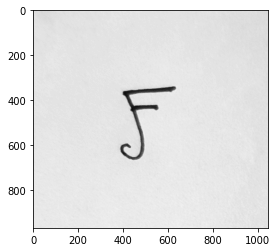

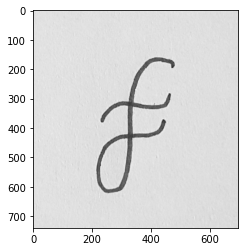

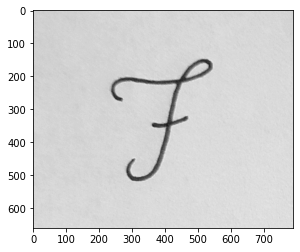

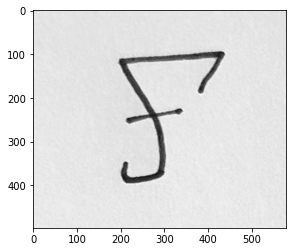

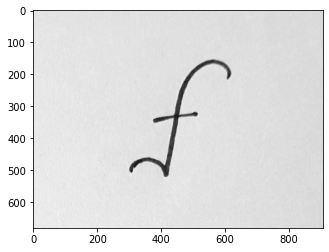

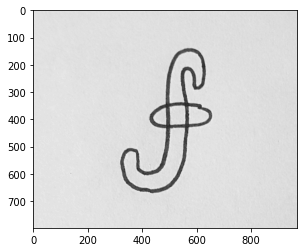

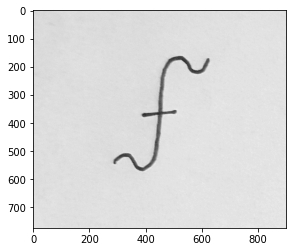

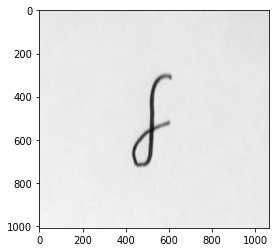

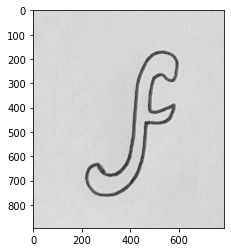

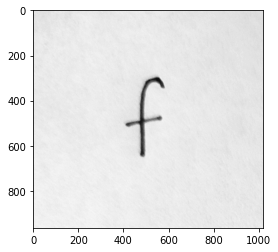

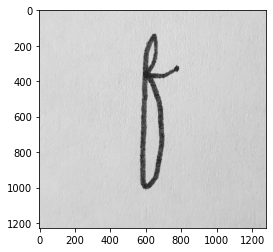

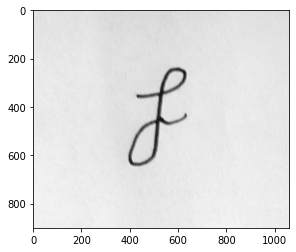

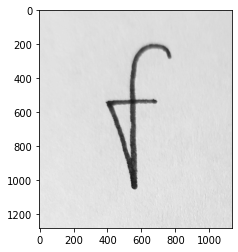

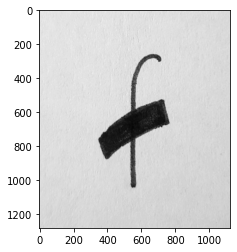

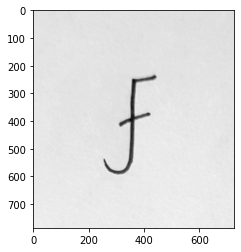

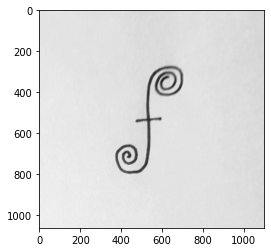

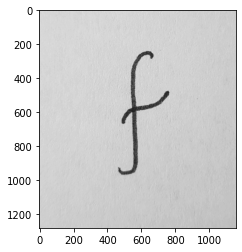

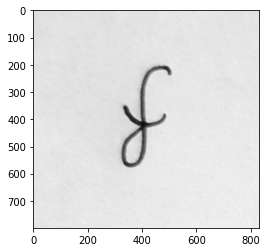

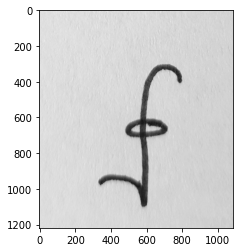

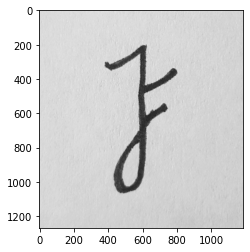

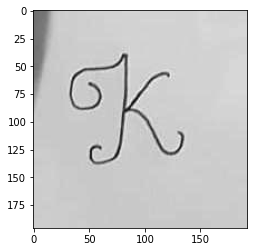

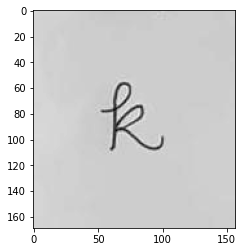

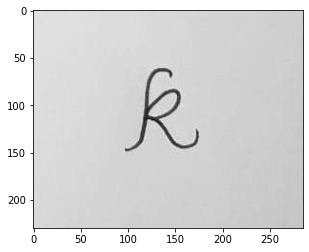

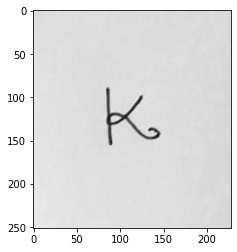

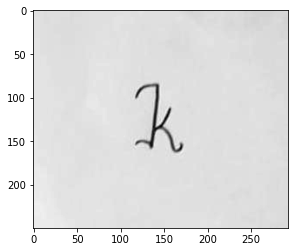

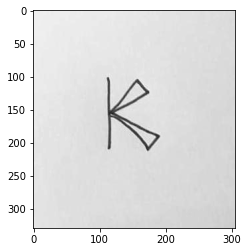

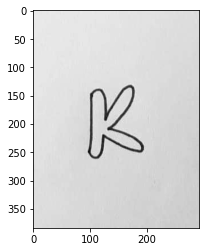

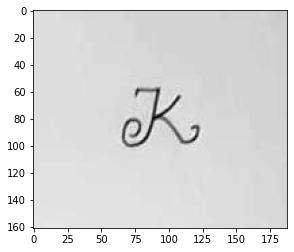

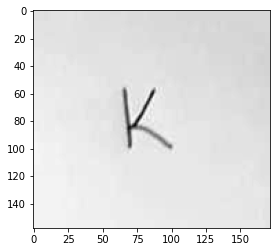

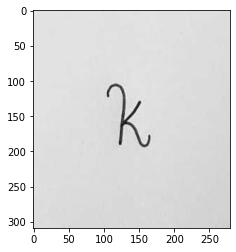

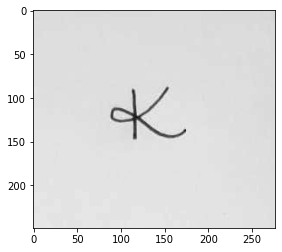

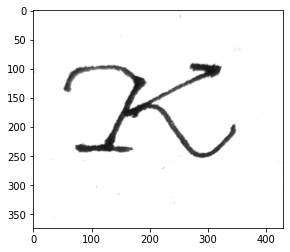

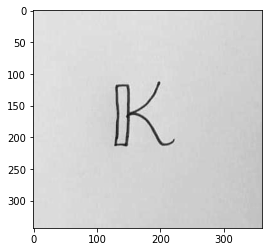

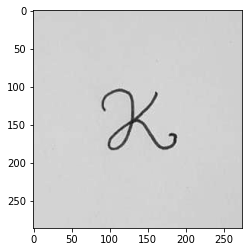

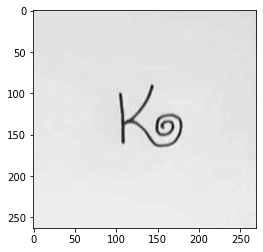

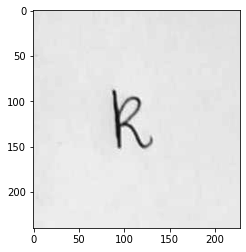

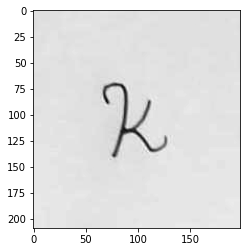

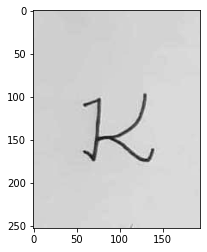

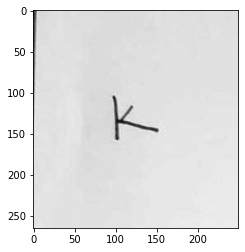

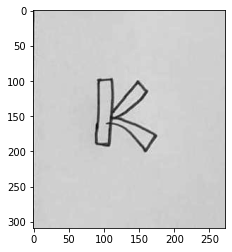

In [ ]:
#https://www.youtube.com/watch?v=j-3vuBynnOE

#pip install opencv-pythonimport tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import os
import cv2

DATADIR = "/content/drive/My Drive/Colab Notebooks/f_and_k/"
#CATEGORIES = ["O", "Other"]
CATEGORIES = ["f", "k"]
#CATEGORIES = ["X"]
#CATEGORIES = ["X", "Other"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            plt.imshow(img_array, cmap="gray")
            plt.show()
        except Exception as e:
            pass


In [ ]:
!ls /content/drive/My\ Drive/Colab\ Notebooks

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random

#DATADIR = "./train/"
#CATEGORIES = ["Jibril", "Sulayman"]
#DATADIR = "./XandO/"
#CATEGORIES = ["X", "O"]
#DATADIR = "./kagglecatsanddogs_3367a/PetImages"
#DATADIR = "./kagglecatsanddogs_small/PetImages"
#CATEGORIES = ["Dog", "Cat"]


IMG_SIZE = 100

training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

create_training_data()
print(len(training_data))

random.shuffle(training_data)

#for sample in training_data:
#    print(sample[1])

X=[]
Y=[]
for features, label in training_data:
    X.append(features)
    Y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE,1)
Y = np.array(Y)
X = X/255.0
#print (X)

40


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pickle

#X=pickle.load(open("X.pickle", "rb"))
#Y = pickle.load(open("Y.pickle","rb"))
#print(X)

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    X, Y, test_size=0.2, random_state=42)
print("X.shape=",X.shape)
print("x_train.shape=",x_train.shape)
print("y_train.shape=",y_train.shape)
print("x_test.shape=",x_test.shape)
print("y_test.shape=",y_test.shape)

callback = EarlyStopping(monitor='val_loss', patience=5)
# This callback will stop the training when there is no improvement in
# the validation loss for five consecutive epochs.



X.shape= (40, 100, 100, 1)
x_train.shape= (32, 100, 100, 1)
y_train.shape= (32,)
x_test.shape= (8, 100, 100, 1)
y_test.shape= (8,)


In [ ]:
model = Sequential()

model.add(Conv2D(14,(3,3),input_shape=X.shape[1:]))
#model.add(Conv2D(7,(3,3),input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(14,(3,3)))
#model.add(Conv2D(7,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
#model.fit(x_train, y_train,batch_size=32,epochs=500,callbacks=[callback],validation_data=(x_test,y_test))
model.fit(x_train, y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test),verbose=2)


Epoch 1/10
1/1 - 1s - loss: 0.7012 - accuracy: 0.5000 - val_loss: 0.9302 - val_accuracy: 0.5000
Epoch 2/10
1/1 - 0s - loss: 0.9397 - accuracy: 0.5000 - val_loss: 0.6855 - val_accuracy: 0.5000
Epoch 3/10
1/1 - 0s - loss: 0.6914 - accuracy: 0.4688 - val_loss: 0.7944 - val_accuracy: 0.5000
Epoch 4/10
1/1 - 0s - loss: 0.7832 - accuracy: 0.5000 - val_loss: 0.7833 - val_accuracy: 0.5000
Epoch 5/10
1/1 - 0s - loss: 0.7590 - accuracy: 0.5000 - val_loss: 0.7044 - val_accuracy: 0.5000
Epoch 6/10
1/1 - 0s - loss: 0.6864 - accuracy: 0.5000 - val_loss: 0.6662 - val_accuracy: 0.5000
Epoch 7/10
1/1 - 0s - loss: 0.6518 - accuracy: 0.6250 - val_loss: 0.6581 - val_accuracy: 0.6250
Epoch 8/10
1/1 - 0s - loss: 0.6604 - accuracy: 0.5938 - val_loss: 0.6544 - val_accuracy: 0.6250
Epoch 9/10
1/1 - 0s - loss: 0.6583 - accuracy: 0.6250 - val_loss: 0.6371 - val_accuracy: 0.6250
Epoch 10/10
1/1 - 0s - loss: 0.6382 - accuracy: 0.7812 - val_loss: 0.6430 - val_accuracy: 0.5000


In [ ]:
model = Sequential()

model.add(Conv2D(28,(5,5),input_shape=X.shape[1:]))
#model.add(Conv2D(14,(5,5),input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(28,(5,5)))
#model.add(Conv2D(14,(5,5)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(28,(5,5)))
#model.add(Conv2D(14,(5,5)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
#model.fit(x_train, y_train,batch_size=32,epochs=500,callbacks=[callback],validation_data=(x_test,y_test))
model.fit(x_train, y_train,batch_size=32,epochs=40,validation_data=(x_test,y_test),verbose=2)


Epoch 1/40
1/1 - 1s - loss: 0.6895 - accuracy: 0.5625 - val_loss: 0.7131 - val_accuracy: 0.3750
Epoch 2/40
1/1 - 1s - loss: 0.6995 - accuracy: 0.5312 - val_loss: 0.6455 - val_accuracy: 0.6250
Epoch 3/40
1/1 - 1s - loss: 0.6975 - accuracy: 0.5000 - val_loss: 0.9227 - val_accuracy: 0.3750
Epoch 4/40
1/1 - 1s - loss: 0.7386 - accuracy: 0.5312 - val_loss: 0.6734 - val_accuracy: 0.7500
Epoch 5/40
1/1 - 1s - loss: 0.6780 - accuracy: 0.5625 - val_loss: 0.6327 - val_accuracy: 0.6250
Epoch 6/40
1/1 - 1s - loss: 0.7172 - accuracy: 0.4688 - val_loss: 0.6345 - val_accuracy: 0.6250
Epoch 7/40
1/1 - 1s - loss: 0.6558 - accuracy: 0.4688 - val_loss: 0.6353 - val_accuracy: 0.6250
Epoch 8/40
1/1 - 1s - loss: 0.6684 - accuracy: 0.5000 - val_loss: 0.6449 - val_accuracy: 0.8750
Epoch 9/40
1/1 - 1s - loss: 0.6326 - accuracy: 0.9375 - val_loss: 0.6516 - val_accuracy: 0.7500
Epoch 10/40
1/1 - 1s - loss: 0.6305 - accuracy: 0.7188 - val_loss: 0.6374 - val_accuracy: 0.7500
Epoch 11/40
1/1 - 1s - loss: 0.5879 - a

In [ ]:
model = Sequential()

model.add(Conv2D(40,(4,4),input_shape=X.shape[1:]))
#model.add(Conv2D(7,(3,3),input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(30,(5,5)))
#model.add(Conv2D(7,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(35,(2,2)))
#model.add(Conv2D(7,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(45,(4,4)))
#model.add(Conv2D(7,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
#model.fit(x_train, y_train,batch_size=32,epochs=500,callbacks=[callback],validation_data=(x_test,y_test))
model.fit(x_train, y_train,batch_size=32,epochs=50,validation_data=(x_test,y_test),verbose=2)


Epoch 1/50
1/1 - 1s - loss: 0.6925 - accuracy: 0.5312 - val_loss: 0.7100 - val_accuracy: 0.3750
Epoch 2/50
1/1 - 1s - loss: 0.6803 - accuracy: 0.5312 - val_loss: 0.7239 - val_accuracy: 0.3750
Epoch 3/50
1/1 - 1s - loss: 0.6724 - accuracy: 0.5625 - val_loss: 0.7129 - val_accuracy: 0.3750
Epoch 4/50
1/1 - 1s - loss: 0.6920 - accuracy: 0.5312 - val_loss: 0.6880 - val_accuracy: 0.6250
Epoch 5/50
1/1 - 1s - loss: 0.6898 - accuracy: 0.4375 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 6/50
1/1 - 1s - loss: 0.6981 - accuracy: 0.5625 - val_loss: 0.7029 - val_accuracy: 0.3750
Epoch 7/50
1/1 - 1s - loss: 0.7145 - accuracy: 0.4375 - val_loss: 0.7025 - val_accuracy: 0.3750
Epoch 8/50
1/1 - 1s - loss: 0.6720 - accuracy: 0.5312 - val_loss: 0.7078 - val_accuracy: 0.3750
Epoch 9/50
1/1 - 1s - loss: 0.6650 - accuracy: 0.6562 - val_loss: 0.6994 - val_accuracy: 0.3750
Epoch 10/50
1/1 - 1s - loss: 0.6691 - accuracy: 0.5938 - val_loss: 0.6919 - val_accuracy: 0.3750
Epoch 11/50
1/1 - 1s - loss: 0.6708 - a

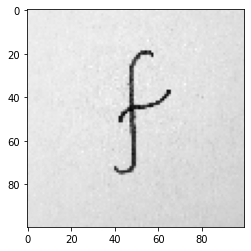

Predicted: f
Actual: f
Probability: [99.99999]
Classify



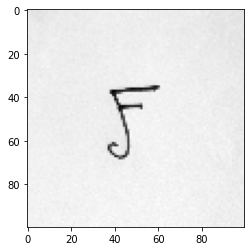

Predicted: k
Actual: f
Probability: [0.97134113]
Misclassify



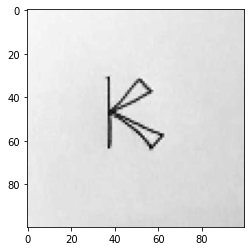

Predicted: k
Actual: k
Probability: [100.]
Classify



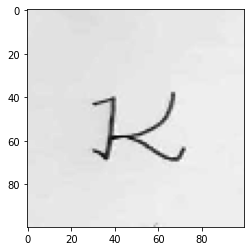

Predicted: k
Actual: k
Probability: [99.937744]
Classify



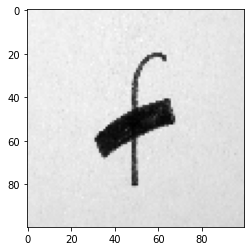

Predicted: f
Actual: f
Probability: [100.]
Classify



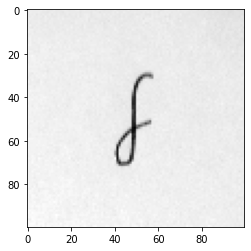

Predicted: f
Actual: f
Probability: [99.95724]
Classify



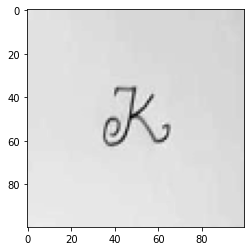

Predicted: k
Actual: k
Probability: [99.98821]
Classify



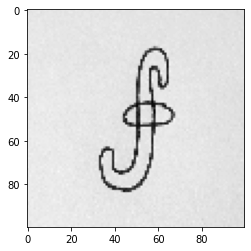

Predicted: f
Actual: f
Probability: [100.]
Classify



In [ ]:
prob = model.predict(x_test)
for i in range(len(x_test)):
  plt.imshow((x_test[i]).reshape(100, 100), cmap="gray")
  plt.show()
  if prob[i] > 0.5:
    print("Predicted: k")
    if y_test[i] == 0:
      print("Actual: f")
      print("Probability:", (1-prob[i])*100)
      print("Misclassify")
    else:
      print("Actual: k")
      print("Probability:", prob[i]*100)
      print("Classify")
  
  else:
    print("Predicted: f")
    if y_test[i] == 0:
      print("Actual: f")
      print("Probability:", (1-prob[i])*100)
      print("Classify")
    else:
      print("Actual: k")
      print("Probability:", prob[i]*100)
      print("Misclassify")

  print()
